# Python to Quant


## Choice library when get data

Consider library list 

**Pandas Datareader**

> https://pypi.org/project/pandas-datareader/
- 2k start

**yfinance**

>https://pypi.org/project/yfinance/
- 8k star

I choice `yfinace`, cuz it is more descirbed from get data and more star of git

## Get Data and Draw Chart

In [2]:

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
aayf = yf.Ticker ("AAPL")
aayf.info

In [4]:
st = datetime(2020,1,1)
ed = datetime(2022,12,31)

pd_apple= aayf.history(start=st, end=ed)

pd_apple.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,72.554924,73.622776,72.297761,73.561546,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.777790,73.617861,72.618594,72.846367,146322800,0.0,0.0


In [5]:
import matplotlib.pyplot as plt
import finterstellar as fs # jusg draw chart

In [6]:

print(f"table columns {pd_apple.columns}\n table index : {pd_apple.index}")

df_apple = pd_apple[['Close']]

print(df_apple.columns)
df_apple.head(2)

table columns Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
 table index : DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2022-12-16 00:00:00-05:00', '2022-12-19 00:00:00-05:00',
               '2022-12-20 00:00:00-05:00', '2022-12-21 00:00:00-05:00',
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00',
               '2022-12-29 00:00:00-05:00', '2022-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=756, freq=None)
Index(['Close'], dtype='object')


,Close
Date,
2020-01-02 00:00:00-05:00,73.561546
2020-01-03 00:00:00-05:00,72.846367


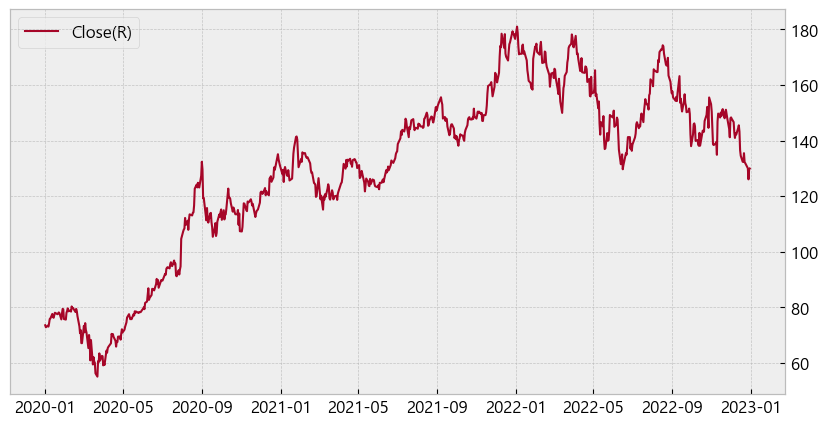

In [7]:
fs.draw_chart(pd_apple, right="Close")

In [8]:
df = df_apple
w = 14
if len(df) > w:
    df['diff'] = df.iloc[:,0].diff()   # 일별 가격차이 계산
    df['au'] = df['diff'].where(df['diff']>0, 0).rolling(w).mean()
    df['ad'] = df['diff'].where(df['diff']<0, 0).rolling(w).mean().abs()
    for r in range(w+1, len(df)):
        df['au'][r] = ( df['au'][r-1]*(w-1) + df['diff'].where(df['diff']>0,0)[r] ) / w
        df['ad'][r] = ( df['ad'][r-1]*(w-1) + df['diff'].where(df['diff']<0,0).abs()[r] ) / w
    df['rsi'] = (df['au'] / (df['au'] + df['ad']) * 100).round(2)
apple_rsi = df[[df.columns[0], 'rsi']]

In [9]:
df_apple['rsi'] = apple_rsi['rsi']

df_apple

,Close,diff,au,ad,rsi
Date,,,,,
2020-01-02 00:00:00-05:00,73.561546,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,72.846367,-0.715179,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,73.426826,0.580460,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,73.081497,-0.345329,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,74.257103,1.175606,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,131.860001,-0.369995,0.837951,1.509602,35.69
2022-12-27 00:00:00-05:00,130.029999,-1.830002,0.778097,1.532488,33.68
2022-12-28 00:00:00-05:00,126.040001,-3.989998,0.722519,1.708024,29.73


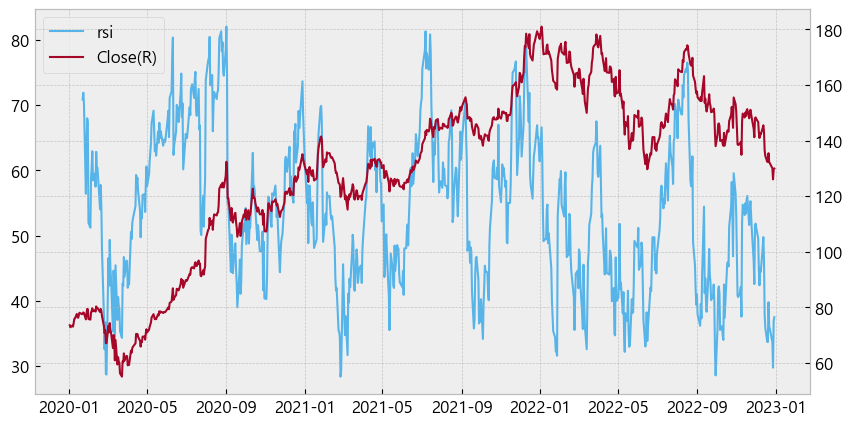

In [10]:
fs.draw_chart(df, left='rsi', right='Close')

## Calculate Backtesting

What if just trading using value of `rsi`?

get make method to trading

- set position 'buy' 'zero' 'sell' ( Buy Low and Sell high)
  - buy : 매수, sell : 매도, zero : 무 포지션
- will be check How to calculate investment evaluation

In [39]:
def indicator_to_signal(df, factor, buy, sell) :
    df['trade'] = np.nan
    if buy >= sell:
        df['trade'].mask(df[factor]>buy, 'buy', inplace=True)
        df['trade'].masak(df[factor]<sell, 'zero', inplace=True)
    else :
        df['trade'].mask(df[factor] < buy, 'buy', inplace=True)
        df['trade'].mask(df[factor] > sell, 'zero', inplace=True)
    df['trade'].fillna(method='ffill', inplace=True)
    df['trade'].fillna('zero', inplace=True)
    return df['trade']
    

In [40]:
indicator_to_signal(df_apple, 'rsi', 40, 60)

Date
2020-01-22 00:00:00-05:00    zero
2020-01-23 00:00:00-05:00    zero
2020-01-24 00:00:00-05:00    zero
2020-01-27 00:00:00-05:00    zero
2020-01-28 00:00:00-05:00    zero
                             ... 
2022-12-23 00:00:00-05:00     buy
2022-12-27 00:00:00-05:00     buy
2022-12-28 00:00:00-05:00     buy
2022-12-29 00:00:00-05:00     buy
2022-12-30 00:00:00-05:00     buy
Name: trade, Length: 743, dtype: object

In [41]:
def set_position(df):
    pos = 'position'
    df[pos] = ''
    df['position'].mask((df['trade'].shift(1)=='zero') & (df['trade']=='zero'), 'zz', inplace=True)
    df['position'].mask((df['trade'].shift(1)=='zero') & (df['trade']=='buy'), 'zb', inplace=True)
    df['position'].mask((df['trade'].shift(1)=='buy') & (df['trade']=='zero'), 'bz', inplace=True)
    df['position'].mask((df['trade'].shift(1)=='buy') & (df['trade']=='buy'), 'bb', inplace=True)

    df['position_chart'] = 0
    df['position_chart'].mask(df['trade']=='buy', 1, inplace=True)
    return df['position']

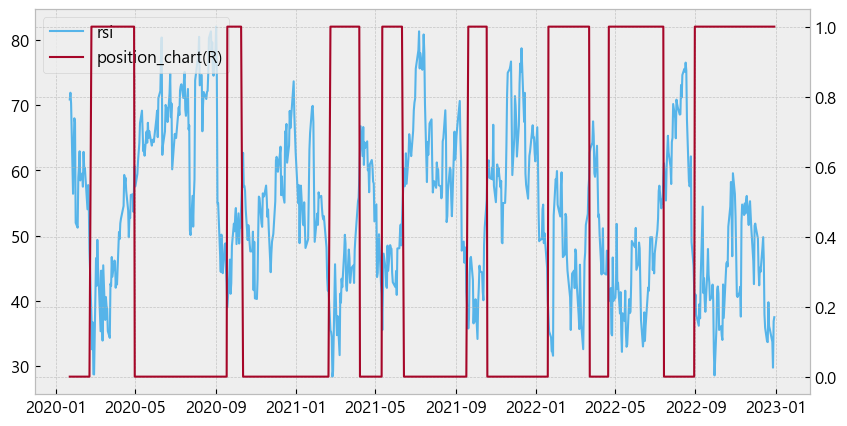

In [42]:
set_position(df_apple)
fs.draw_chart(df_apple, left='rsi', right="position_chart")

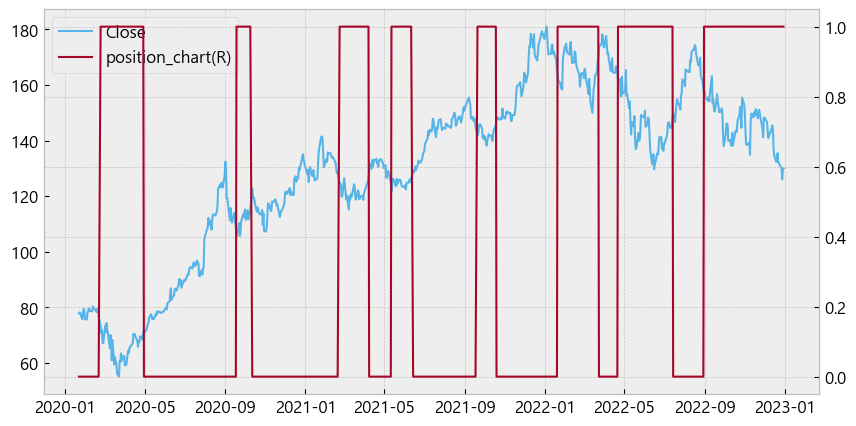

In [43]:
fs.draw_chart(df_apple, left='Close', right="position_chart")

In [44]:
def set_evaluate(df, cost=.001):
    '''
    Calculate daily returns and MDDs of portfolio
    :param df: The dataframe containing trading position
    :param cost: Transaction cost when sell
    :return: Returns, MDD
    '''
    df['signal_price'] = np.nan
    df['signal_price'].mask(df['position']=='zb', df.iloc[:,0], inplace=True)
    df['signal_price'].mask(df['position']=='bz', df.iloc[:,0], inplace=True)


    record = df[['position','signal_price']].dropna()
    record['rtn'] = 1
    record['rtn'].mask(record['position']=='bz', (record['signal_price']*(1-cost))/record['signal_price'].shift(1), inplace=True)
    record['acc_rtn'] = record['rtn'].cumprod()
    df['signal_price'].mask(df['position']=='bb', df.iloc[:,0], inplace=True)
    df['rtn'] = record['rtn']
    df['rtn'].fillna(1, inplace=True)
    df['daily_rtn'] = 1
    df['daily_rtn'].mask(df['position'] == 'bb', df['signal_price'] / df['signal_price'].shift(1), inplace=True)
    df['daily_rtn'].mask(df['position'] == 'bz', (df['signal_price']*(1-cost)) / df['signal_price'].shift(1), inplace=True)
    df['daily_rtn'].fillna(1, inplace=True)
    df['acc_rtn'] = df['daily_rtn'].cumprod()
    df['acc_rtn_dp'] = ((df['acc_rtn']-1)*100).round(2)
    df['mdd'] = (df['acc_rtn'] / df['acc_rtn'].cummax()).round(4)
    df['bm_mdd'] = (df.iloc[:, 0] / df.iloc[:, 0].cummax()).round(4)
    df.drop(columns='signal_price', inplace=True)
    return df

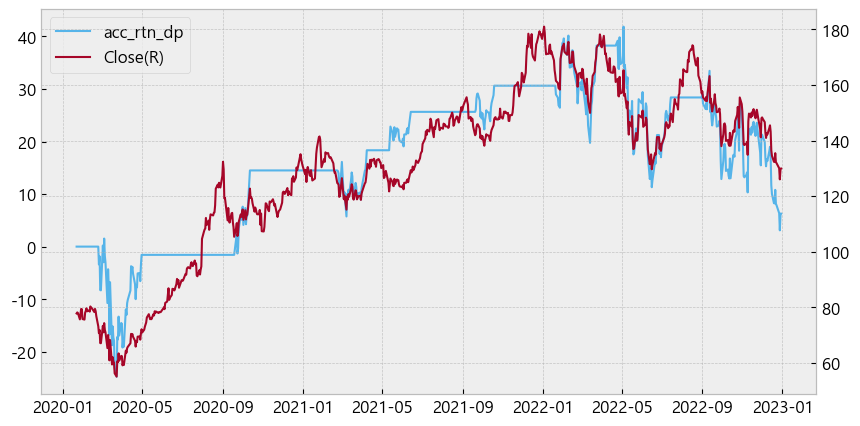

In [45]:
set_evaluate(df_apple, 0.001)
fs.draw_chart(df_apple, left='acc_rtn_dp', right='Close')

In [46]:
def performance(df, rf_rate=.01):
    '''
    Calculate additional information of portfolio
    :param df: The dataframe with daily returns
    :param rf_rate: Risk free interest rate
    :return: Number of trades, Number of wins, Hit ratio, Sharpe ratio, ...
    '''
    rst = {}
    rst['no_trades'] = (df['position']=='zl').sum()
    rst['no_win'] = (df['rtn']>1).sum()
    rst['acc_rtn'] = df['acc_rtn'][-1].round(4)
    rst['hit_ratio'] = round((df['rtn']>1).sum() / rst['no_trades'], 4) if rst['no_trades']>0 else 0
    rst['avg_rtn'] = round(df[df['rtn']!=1]['rtn'].mean(), 4)
    rst['period'] = __get_period(df)
    rst['annual_rtn'] = __annualize(rst['acc_rtn'], rst['period'])
    rst['bm_rtn'] = round(df.iloc[-1,0]/df.iloc[0,0], 4)
    rst['sharpe_ratio'] = __get_sharpe_ratio(df, rf_rate)
    rst['mdd'] = df['mdd'].min()
    rst['bm_mdd'] = df['bm_mdd'].min()

    print('CAGR: {:.2%}'.format(rst['annual_rtn'] - 1))
    print('Accumulated return: {:.2%}'.format(rst['acc_rtn'] - 1))
    print('Average return: {:.2%}'.format(rst['avg_rtn'] - 1))
    print('Benchmark return : {:.2%}'.format(rst['bm_rtn']-1))
    print('Number of trades: {}'.format(rst['no_trades']))
    print('Number of win: {}'.format(rst['no_win']))
    print('Hit ratio: {:.2%}'.format(rst['hit_ratio']))
    print('Investment period: {:.1f}yrs'.format(rst['period']/365))
    print('Sharpe ratio: {:.2f}'.format(rst['sharpe_ratio']))
    print('MDD: {:.2%}'.format(rst['mdd']-1))
    print('Benchmark MDD: {:.2%}'.format(rst['bm_mdd']-1))
    return


In [47]:
fs.performance(df_apple, rf_rate=0.01) 

CAGR: 2.09%
Accumulated return: 6.28%
Average return: 3.85%
Benchmark return : 66.98%
Number of trades: 0
Number of win: 5
Hit ratio: 0.00%
Investment period: 2.9yrs
Sharpe ratio: 0.03
MDD: -27.33%
Benchmark MDD: -31.43%
